# Interpolation

## Generate data points

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

Modify $x$ and $y$ values by adding random numbers

In [3]:
npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list, correctFunction(x_list)])

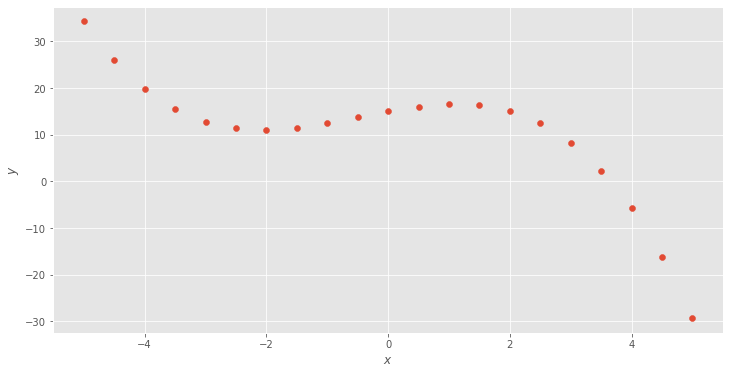

In [4]:
plt.figure(figsize=(12,6));
plt.scatter(data0[0], data0[1])
plt.xlabel('$x$');
plt.ylabel('$y$');

In [5]:
0.1 * (2*np.random.rand(npoints)-1)

array([-0.01373772, -0.01269267, -0.04501329,  0.07745813, -0.07904041,
       -0.0533903 , -0.04844746, -0.00022525,  0.04177382,  0.02826133,
        0.08457681,  0.07543832,  0.03810432,  0.06751896,  0.06870151,
       -0.01489657, -0.03849369, -0.05401591,  0.00801599,  0.08942554,
       -0.03822249])

In [6]:
data = np.array([data0[0]+ 0.25 * (2*np.random.rand(npoints)-1), 
                 data0[1] + 5 * (2*np.random.rand(npoints)-1)])

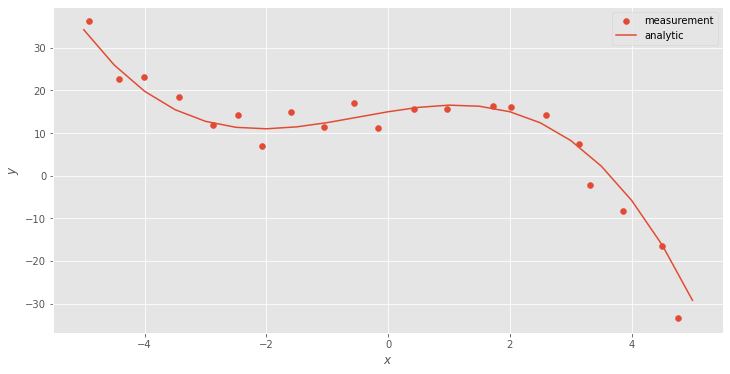

In [7]:
plt.figure(figsize=(12,6));
plt.scatter(data[0], data[1], label='measurement');
plt.plot(data0[0], data0[1], label='analytic');
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();

## Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### Unperturbed data

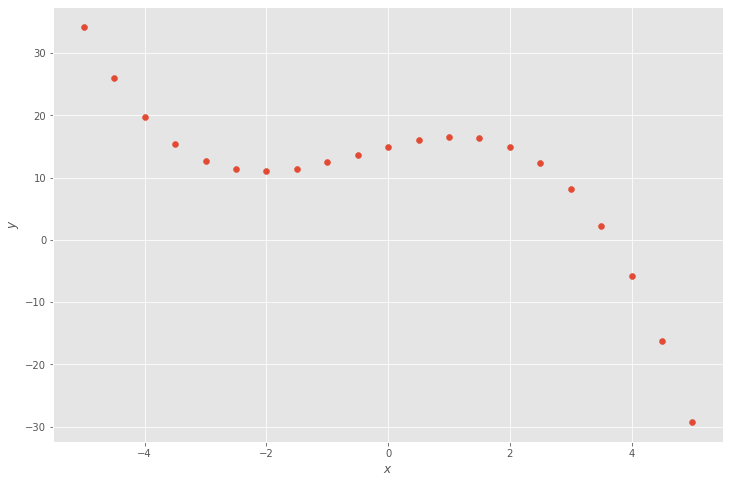

In [8]:
plt.figure(figsize=(12,8));
plt.scatter(data0[0], data0[1]);
plt.xlabel('$x$');
plt.ylabel('$y$');

In [9]:
from scipy import interpolate

* linear splines

In [10]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind='linear')

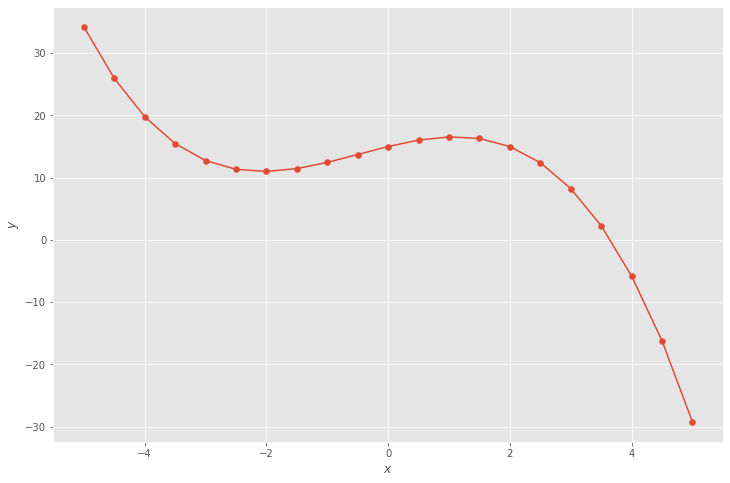

In [11]:
plt.figure(figsize=(12,8));
plt.scatter(data0[0], data0[1], label='true');
plt.plot(data0[0], splineLinear0(data0[0]))
plt.xlabel('$x$');
plt.ylabel('$y$');

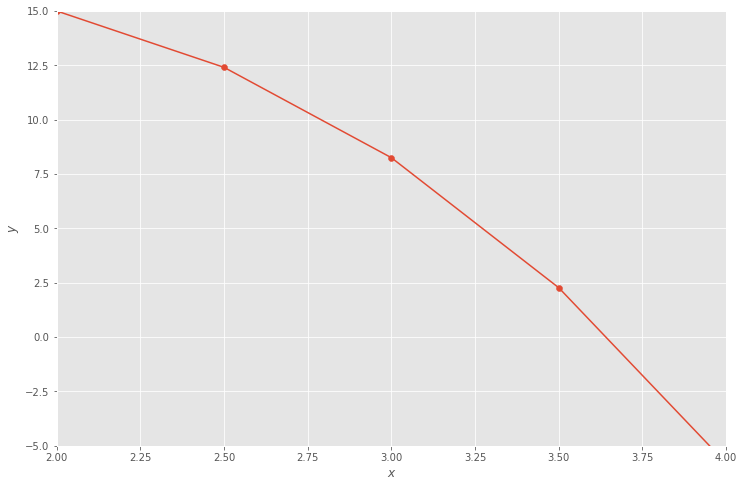

In [12]:
plt.figure(figsize=(12,8));

plt.scatter(data0[0], data0[1], label='true');

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list));
plt.xlim([2,4]);
plt.ylim([-5,15]);
plt.xlabel('$x$');
plt.ylabel('$y$');

* cubic spline

In [13]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind='cubic')

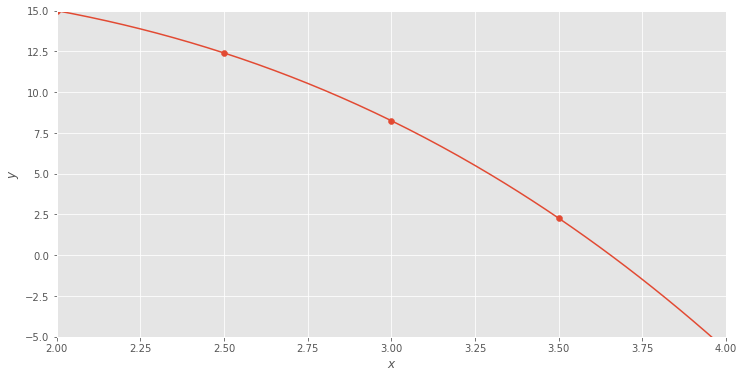

In [14]:
plt.figure(figsize=(12,6));

plt.scatter(data0[0], data0[1], label='true');

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list));
plt.xlim([2,4]);
plt.ylim([-5,15]);
plt.xlabel('$x$');
plt.ylabel('$y$');

## Perturbed data

In [15]:
splineCubic = interpolate.interp1d(data[0], data[1], kind='cubic')

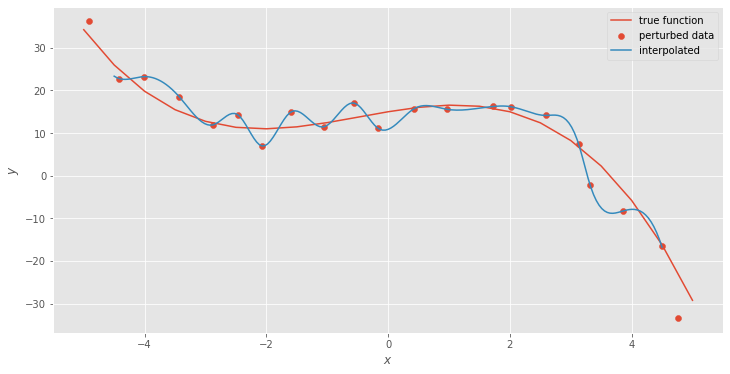

In [16]:
plt.figure(figsize=(12,6));
plt.plot(data0[0], data0[1], label='true function');

plt.scatter(data[0], data[1], label='perturbed data');

x_list = np.linspace(-4.5,4.5,201)
plt.plot(x_list, splineCubic(x_list), label='interpolated');

plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();

* How to handle data which is not smooth?

In [17]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)

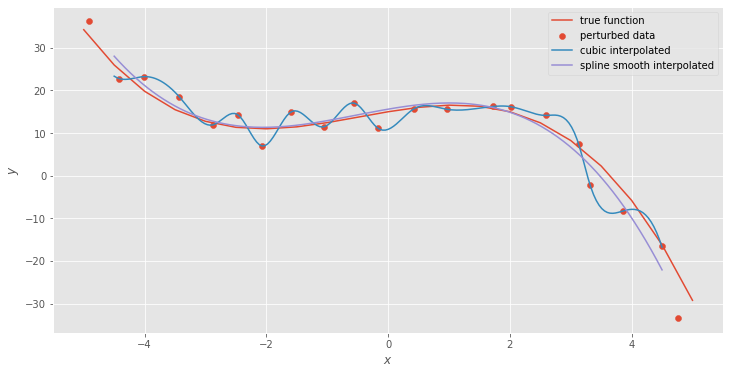

In [18]:
plt.figure(figsize=(12,6));
plt.plot(data0[0], data0[1], label='true function');

plt.scatter(data[0], data[1], label='perturbed data');

x_list = np.linspace(-4.5,4.5,201)
plt.plot(x_list, splineCubic(x_list), label='cubic interpolated');
plt.plot(x_list, splineSmooth(x_list), label='spline smooth interpolated');

plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();

## How we can always fit data with a polynomial

In [38]:
datapoly = data[:,7:14]

In [20]:
datapoly

array([[-1.60072063, -1.0612564 , -0.55958185, -0.16269993,  0.43118454,
         0.96003956,  1.72185258],
       [14.9106649 , 11.44681332, 17.03838125, 11.08659814, 15.74932065,
        15.59020376, 16.23653369]])

We have 7 data points. That means we need a 6th order polynomial for the perfect interpolation:

$$
f(x) = a_{0} + a_{1}x + a_{2}x^{2} + a_{3}x^{3} + a_{4}x^{4} + a_{5}x^{5} + a_{6}x^{6}.
$$

This polynomial gives the correct value for all points $x_{i}, y_{i}$:

$$
y_{i} = a_{0} + a_{i}x_{i} + a_{2}x_{i}^{2} + a_{3}x_{i}^{3} + a_{4}x_{i}^{4} + a_{5}x_{i}^{5} + a_{6}x_{i}^{6}.
$$

We can express these 7 equations $(i = 0, \cdots, 6)$ as a matrix equation:

$$
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6 
\end{bmatrix} = \begin{bmatrix}
1 & x_0 & x_{0}^{2} & x_{0}^{3} & x_{0}^{4} & x_{0}^{5} & x_{0}^{6} \\
1 & x_1 & x_{1}^{2} & x_{1}^{3} & x_{1}^{4} & x_{1}^{5} & x_{1}^{6} \\
1 & x_2 & x_{2}^{2} & x_{2}^{3} & x_{2}^{4} & x_{2}^{5} & x_{2}^{6} \\
1 & x_3 & x_{3}^{2} & x_{3}^{3} & x_{3}^{4} & x_{3}^{5} & x_{3}^{6} \\
1 & x_4 & x_{4}^{2} & x_{4}^{3} & x_{4}^{4} & x_{4}^{5} & x_{4}^{6} \\
1 & x_5 & x_{5}^{2} & x_{5}^{3} & x_{5}^{4} & x_{5}^{5} & x_{5}^{6} \\
1 & x_6 & x_{6}^{2} & x_{6}^{3} & x_{6}^{4} & x_{6}^{5} & x_{6}^{6} 
\end{bmatrix} \begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
a_3 \\
a_4 \\
a_5 \\
a_6 
\end{bmatrix}
$$

The middle matrix is just a matrix of numbers that we can calculate

In [22]:
x = np.transpose(np.array([datapoly[0,:]**0, datapoly[0,:]**1,
             datapoly[0,:]**2, datapoly[0,:]**3,
             datapoly[0,:]**4, datapoly[0,:]**5,
             datapoly[0,:]**6]))

In [31]:
y = datapoly[1,:]

Now we can solve the system of linear (in $a_{i}$) equations. We use a numpy routine.

If you want to program this yourself: Gaussian elimination method.

For matrices: LU decomposition (lower-upper factorization of a matrix as the product of a lower triangular matrix and an upper triangular matrix).

In [32]:
a = np.linalg.solve(x,y)

In [33]:
a

array([ 10.28124389,   0.58395817,  35.29956125,   1.01693312,
       -42.85334838,  -1.24236507,  11.15049459])

In [35]:
x_list = np.linspace(-2.5, 2.5, 901)
y_list = a[0]*x_list** 0 + a[1]*x_list** 1 + a[2]*x_list** 2 + a[3]*x_list** 3 + \
         a[4]*x_list** 4 + a[5]*x_list** 5 + a[6]*x_list** 6

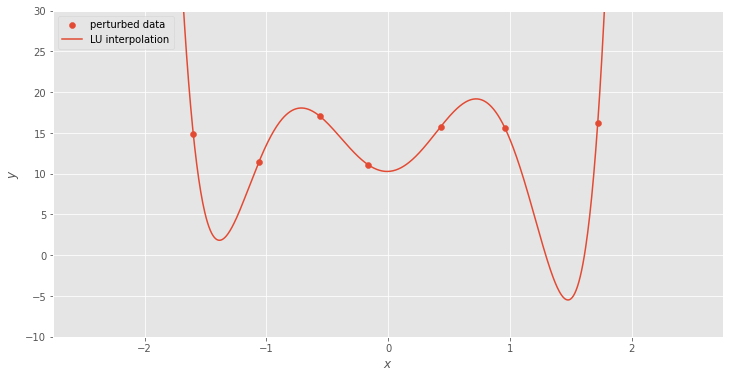

In [41]:
plt.figure(figsize=(12, 6));

plt.scatter(datapoly[0], datapoly[1], label='perturbed data');
plt.plot(x_list, y_list, label='LU interpolation');

plt.ylim([-10, 30]);
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend();